In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")
Dataset = 'Face_mask_dataset'
Data_dir = os.listdir(Dataset)
print(Data_dir)

['without_mask', 'with_incorrect_mask', 'with_mask']


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

img_rows,img_cols = 255,255

images = []
labels = []

for category in Data_dir:
  folder_path = os.path.join(Dataset,category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    img = cv2.imread(img_path)
    grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(grayscale_img,(img_rows,img_cols))
    images.append(resized_img)
    labels.append(category)


images = np.array(images)/255.0
images = np.reshape(images,(images.shape[0],img_rows,img_cols,1))




In [ ]:
labels_num=[]
for i in labels:
  if i == 'without_mask':
    labels_num.append(0)
  elif i == 'with_incorrect_mask':
    labels_num.append(1)
  else:
    labels_num.append(2)
print(labels_num)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
labels_num = np.array(labels_num)
labels_num = convert_to_one_hot(labels_num, 3).T
#labels_num = np.reshape(labels_num,(3,5822))
print(labels_num)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
(train_X, test_X,train_Y, test_Y) = train_test_split(images,labels_num,test_size=0.25,random_state = 0)

In [ ]:
print ("number of training examples = " + str(train_X.shape[0]))
print ("number of test examples = " + str(test_X.shape[0]))
print ("train_X shape: " + str(train_X.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X.shape))
print ("test_Y shape: " + str(test_Y.shape))

number of training examples = 4441
number of test examples = 1481
train_X shape: (4441, 255, 255, 1)
train_Y shape: (4441,)
test_X shape: (1481, 255, 255, 1)
test_Y shape: (1481,)


In [ ]:
#CNN model using Keras

model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape = (img_rows, img_cols,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 251, 251, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 123, 123, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 64)        0

In [ ]:
hist = model.fit(train_X,train_Y,batch_size= 32, epochs=15, validation_split=0.20)

In [ ]:
model.evaluate(test_X,test_Y) #checking accuracy of model on test set

47/47 [==============================] - 2s 35ms/step - loss: 0.0659 - accuracy: 0.9872


[0.06591011583805084, 0.9871708154678345]

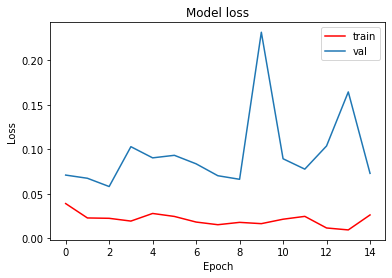

In [ ]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc = 'upper right')
plt.show()

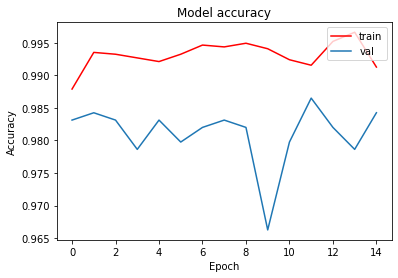

In [ ]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc = 'upper right')
plt.show()

In [ ]:
model.save('face_mask_detection.h5')

In [ ]:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Face_mask_dataset/with_mask/00001.jpg')
    grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(grayscale_img,(255,255))
    img_pred = image.img_to_array(resized_img)
    img_pred = np.expand_dims(img_pred, axis = 0)

[[0.6877768  0.30996627 0.00225693]]


In [ ]:
for i in rslt:
  index = np.argmax(i)
  if index == 0:
    print("without_mask")
  elif index == 1:
    print("with_incorrect_mask")
  else:
    print("with_mask")
  

In [ ]:
print(len(rslt[0]))